<a href="https://colab.research.google.com/github/DAG00DAG33/ML-Languages/blob/master/Keras/Keras_Faces_Sliders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos y cargamos todo

In [1]:
import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt
%matplotlib inline     
import matplotlib as mpl
import numpy as np
from PIL import Image
import cv2

import pickle
import h5py

In [2]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/ML/Faces/'

Mounted at /content/drive


In [15]:
with open(PATH + "Names.txt", "rb") as fp:
  Names = pickle.load(fp)
  
  
dataset = h5py.File(PATH + "facesDatabase.h5", "r")
X_orig = np.array(dataset["X"][:]) 
X_img = X_orig/255.

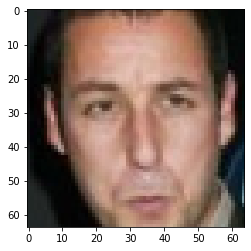

In [4]:
plt.imshow(X_img[34])

In [5]:
from keras import layers
from keras.layers import Input, Dense , ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Dropout, Activation, Add
from keras.layers import MaxPooling2D, ReLU
from keras import activations
from keras.models import Model, clone_model
from keras.models import model_from_json
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import optimizers

from keras.layers import UpSampling2D
from keras.layers import Reshape

import keras.backend as K
K.set_image_data_format('channels_last')

# Creamos el modelo autoencoder

Veremos que no da resultados demasiados buenos, usar solo embeding funcionara mejor

## modelo


In [ ]:

# Entrada de los datos
X_input = Input((64,64,3))
X = BatchNormalization()(X_input)
#     X= Dropout(0.5)(X)

X = Conv2D(120, (8, 8), strides = (1, 1), padding='same', activation="relu")(X) 

X = MaxPooling2D((2, 2))(X)
X = Conv2D(160, (3, 3), strides = (1, 1), padding='same')(X) 
X = BatchNormalization()(X)
X = ReLU()(X)

X = MaxPooling2D((2, 2))(X)
X = Conv2D(200, (4, 4), strides = (1, 1), padding='same')(X) 
X = BatchNormalization()(X)
X = ReLU()(X)

X = MaxPooling2D((2, 2))(X)
X = Conv2D(240, (4, 4), strides = (1, 1), padding='same')(X) 
X = BatchNormalization()(X)
X = ReLU()(X)

X = MaxPooling2D((2, 2))(X)
X = Conv2D(240, (4, 4), strides = (1, 1), padding='same')(X) 
X = BatchNormalization()(X)
X = ReLU()(X)


#     X = MaxPooling2D((2, 2), name='max_pool2')(X)  
#########################



X = Flatten()(X)
encoding = Dense(300, name='encoding', activation = "relu")(X)
X = Dense(4*4*240, name='fc2', activation = "relu")(encoding)
X = Reshape((4,4,240))(X)
X = BatchNormalization()(X)

#########################
#     X = UpSampling2D((2, 2))(X)

X = Conv2D(240, (8, 8), strides = (1, 1),  padding='same')(X) 

X = UpSampling2D((2, 2))(X)
X = Conv2D(240, (16, 16), strides = (1, 1),  padding='same')(X)  
X = BatchNormalization()(X)   
X = ReLU()(X)

X = UpSampling2D((2, 2))(X)
X = Conv2D(200, (16, 16), strides = (1, 1),  padding='same')(X)  
X = BatchNormalization()(X)
X = ReLU()(X)

X = UpSampling2D((2, 2))(X)
X = Conv2D(160, (16, 16), strides = (1, 1),  padding='same')(X) 
X = BatchNormalization()(X)
X = ReLU()(X)

X = UpSampling2D((2, 2))(X)
X = Conv2D(120, (16, 16), strides = (1, 1),  padding='same')(X) 
X = BatchNormalization()(X)
X = ReLU()(X)
X = Conv2D(3, (8, 8), strides = (1, 1),  padding='same')(X)#tahn
X = BatchNormalization()(X)
X = layers.Activation(activations.sigmoid)(X)





full_model  = Model(inputs = X_input, outputs = X)
# encoder = Model(X_input, encoding)
# decoder = Model(encoding, X)

full_model.compile('adam', 'mean_squared_error')

In [ ]:
print(full_model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 120)       23160     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 120)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 160)       172960    
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 160)       640       
_________________________________________________________________
re_lu_16 (ReLU)              (None, 32, 32, 160)      

## Entrenamos

Habria que hacerlo por checkpoints
https://machinelearningmastery.com/check-point-deep-learning-models-keras/


In [ ]:
for i in range(8,18): 
  print(i)
  history = full_model.fit(index, X, epochs=10)
#   plt.plot(history.history['loss'])#100
  # Guardar modelo en JSON
  model_json = full_model.to_json()
  with open(PATH + "/modelos/modeloV2_"+str(i*10)+".json", "w") as json_file:
      json_file.write(model_json)
  # Guardar Weights
  full_model.save_weights(PATH + "/modelos/modeloV2_"+str(i*10)+".h5")
  print("Model saved")

Epoch 1/20
178/178 [==============================] - 48s 269ms/step - loss: 0.0376
Epoch 2/20
178/178 [==============================] - 49s 278ms/step - loss: 0.0255
Epoch 3/20
178/178 [==============================] - 50s 283ms/step - loss: 0.0217
Epoch 4/20
178/178 [==============================] - 51s 284ms/step - loss: 0.0185
Epoch 5/20
178/178 [==============================] - 51s 288ms/step - loss: 0.0177
Epoch 6/20
178/178 [==============================] - 52s 289ms/step - loss: 0.0170
Epoch 7/20
178/178 [==============================] - 52s 291ms/step - loss: 0.0160
Epoch 8/20
178/178 [==============================] - 52s 293ms/step - loss: 0.0152
Epoch 9/20
178/178 [==============================] - 52s 293ms/step - loss: 0.0140
Epoch 10/20
178/178 [==============================] - 52s 294ms/step - loss: 0.0134
Epoch 11/20
178/178 [==============================] - 52s 294ms/step - loss: 0.0128
Epoch 12/20
178/178 [==============================] - 52s 294ms/step - lo

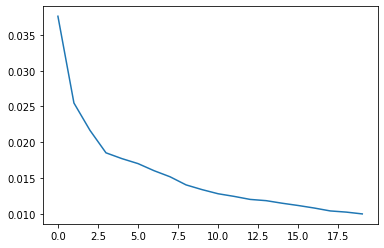

In [ ]:
history = full_model.fit(X_img, X_img, epochs=20)
plt.plot(history.history['loss'])#100

## Guardamos

In [ ]:
# Guardar modelo en JSON
model_json = full_model.to_json()
with open(PATH + "/modelos_embedings/modelo_reformas.json", "w") as json_file:
    json_file.write(model_json)
# Guardar Weights
full_model.save_weights(PATH + "/modelos_embedings/modelo_reformas.h5")
print("Model saved")

Model saved


In [ ]:
# Cargar modelo
json_file = open(PATH + '/modelos/modelo600Huge4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
full_model = model_from_json(loaded_model_json)
# Cargar Weights (Lo que ya ha aprendido)
full_model.load_weights(PATH + "/modelos/modelo600Huge4.h5")
# Compilar modelo par apoder entrenarlo
full_model.compile('adam', 'mean_squared_error')
print("Model loaded")

## Usamos

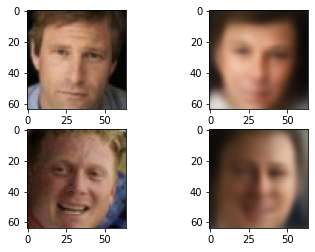

In [ ]:
c = 0
a, b = c, c+2
fig, axs = plt.subplots(b-a, 2)
X_pred = full_model.predict(X_img[0:50])
for i in range(a,b):

  axs[i-a,0].imshow(X_img[i])

  axs[i-a,1].imshow(X_pred[i])

## Dividimos el modelo

Hay que dividirlo en encoder y decoder para poder manejar las caras con sliders

In [ ]:
encoder = Model(inputs=full_model.input, outputs=full_model.layers[20].output)

In [ ]:
inp = Input((300,))
Y = full_model.layers[21](inp)
for i in range(22, 39):
  Y = full_model.layers[i](Y)
  
decoder=Model(inp, Y)

In [ ]:
decoder.summary()

In [ ]:
encoder.summary()

In [ ]:
enc = encoder.predict(X_img)
pre = decoder.predict(enc)

In [ ]:
print(enc.shape)
print(pre.shape)

In [ ]:
plt.imshow(pre[0])

# Usamos solo embedings
En vez de usar un encoder y un decoder solo usamos un decoder. Esto lo logramos haciendo que la red neuronal aprenda directamente los 'embedings' en vez de generarlos con un encoder. Es decir se apredenra de memoria el enc de cada foto. En vez de aprender todo el encoder, solo tiene que aprender los enc.

La desventaja es que no funciona con caras nuevas que no ha visto nunca.

## Preparamos el input
Tiene que ser un one hot encoding por cada imagen

In [19]:
def COH(Y, C): #one hot vector
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


index = []
for i in range(X_img.shape[0]):
  index.append(i)
index = np.asarray(index)
index = COH(index, X_img.shape[0])
index

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Modelo

In [ ]:
def model(size):
    X_input = Input((size,))

    X = Dense(300, name='encoding',  use_bias=False)(X_input) ##esto es el embeding que tiene que aprender
    X = Dense(8*8*30, name='fc1')(X)
    X = Reshape((8,8,30))(X)

    #########################
    
    X = Conv2D(60, (6, 6), strides = (1, 1),  padding='same', activation="relu")(X) 
    X = Conv2D(60, (6, 6), strides = (1, 1),  padding='same', activation="relu")(X) 

    
    X = UpSampling2D((2, 2))(X)
    X = Conv2D(40, (6, 6), strides = (1, 1),  padding='same', activation="relu")(X)
    X = Conv2D(40, (4, 4), strides = (1, 1),  padding='same', activation="relu")(X) 
    # X = Conv2D(40, (4, 4), strides = (1, 1),  padding='same', activation="relu")(X)

    
    X = UpSampling2D((2, 2))(X)
    X = Conv2D(20, (6, 6), strides = (1, 1),  padding='same', activation="relu")(X) 
    X = Conv2D(20, (4, 4), strides = (1, 1),  padding='same', activation="relu")(X)
    # X = Conv2D(20, (4, 4), strides = (1, 1),  padding='same', activation="relu")(X)

    
    X = UpSampling2D((2, 2))(X)
    X = Conv2D(10, (6, 6), strides = (1, 1),  padding='same', activation="relu")(X)
    X = Conv2D(10, (4, 4), strides = (1, 1),  padding='same', activation="relu")(X) 
    X = Conv2D(3, (8, 8), strides = (1, 1),  padding='same', activation="sigmoid")(X)#tahn



  
    
    
    model = Model(inputs = X_input, outputs = X, name='Model')

    return model
  
  
  
full_model_e  = model(X.shape[0]) 
full_model_e.compile('adam', 'mean_squared_error')

In [ ]:
full_model_e.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 5696)              0         
_________________________________________________________________
encoding (Dense)             (None, 300)               1708800   
_________________________________________________________________
fc2 (Dense)                  (None, 1920)              577920    
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 30)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 60)          64860     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 60)          129660    
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 16, 16, 60)        0     

## Entrenamos

Habria que hacerlo por checkpoints
https://machinelearningmastery.com/check-point-deep-learning-models-keras/

In [ ]:
for i in range(0,1): 
  print(i)
  history = full_model_e.fit(index, X, epochs=10)
#   plt.plot(history.history['loss'])#100
  # Guardar modelo en JSON
  model_json = full_model_e.to_json()
  with open(PATH + "/modelos_embedings/modeloV3_"+str(i*10)+".json", "w") as json_file:
      json_file.write(model_json)
  # Guardar Weights
  full_model_e.save_weights(PATH + "/modelos_embedings/modeloV3_"+str(i*10)+".h5")
  print("Model saved")

0
Epoch 1/10
5696/5696 [==============================] - 29s 5ms/step - loss: 0.0441
Epoch 2/10
5696/5696 [==============================] - 29s 5ms/step - loss: 0.0437
Epoch 3/10
5696/5696 [==============================] - 29s 5ms/step - loss: 0.0431
Epoch 4/10
5696/5696 [==============================] - 29s 5ms/step - loss: 0.0419
Epoch 5/10
5696/5696 [==============================] - 29s 5ms/step - loss: 0.0417
Epoch 6/10
5696/5696 [==============================] - 29s 5ms/step - loss: 0.0417
Epoch 7/10
5600/5696 [============================>.] - ETA: 0s - loss: 0.0416

In [ ]:
history = full_model_e.fit(index, X, epochs=10)



Epoch 1/10
5696/5696 [==============================] - 11s 2ms/step - loss: 0.0029
Epoch 2/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0026
Epoch 3/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0026
Epoch 4/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0028
Epoch 5/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0029
Epoch 6/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0029
Epoch 7/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0028
Epoch 8/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0028
Epoch 9/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0029
Epoch 10/10
5696/5696 [==============================] - 10s 2ms/step - loss: 0.0029


## Guardamos

In [ ]:
# Guardar modelo en JSON
model_json = full_model_e.to_json()
with open(PATH + "/modelos_embedings/modelo2_200.json", "w") as json_file:
    json_file.write(model_json)
# Guardar Weights
full_model_e.save_weights(PATH + "/modelos_embedings/modelo2_200.h5")
print("Model saved")

Model saved


In [6]:
# Cargar modelo
json_file = open(PATH + '/modelos_embedings/modelo2_200.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
full_model_e = model_from_json(loaded_model_json)
# Cargar Weights (Lo que ya ha aprendido)
full_model_e.load_weights(PATH + "/modelos_embedings/modelo2_200.h5")
# Compilar modelo par apoder entrenarlo
full_model_e.compile('adam', 'mean_squared_error')
print("Model loaded")

Model loaded


## Usamos

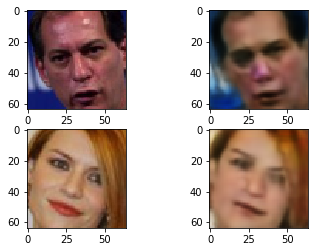

In [ ]:
c = 1000
a, b = c, c+2
fig, axs = plt.subplots(b-a, 2)
X_pred = full_model_e.predict(index[0:1050])
for i in range(a,b):
#   plt.subplot((b-a)*100+(b-a)*10+i*2+1)
  axs[i-a,0].imshow(X[i])
#   plt.subplot((b-a)*100+20+i*2+2)
  axs[i-a,1].imshow(X_pred[i])

### Dividimos el modelo

In [7]:
inp = Input((300,))
Y = full_model_e.layers[2](inp)
for i in range(3, 16):
  Y = full_model_e.layers[i](Y)
  
decoder_e=Model(inp, Y)

In [8]:
enc = full_model_e.layers[1].get_weights()

In [10]:
enc = np.asarray(enc)
enc = enc[0]

#PCA

In [ ]:
enc = encoder.predict(X)
pre = decoder.predict(enc)

In [11]:
from sklearn.decomposition import PCA
pca=PCA()
pca_enc = pca.fit_transform(enc)

[2 9 6 ... 4 0 9]


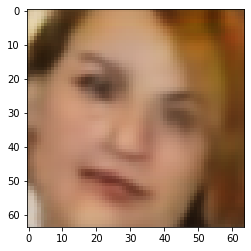

In [12]:
print(np.argmax(pca_enc, axis=1))
# pca_enc[3,6] = -5
enc2 = pca.inverse_transform(pca_enc[0:1100])
pre2 = decoder_e.predict(enc2)
plt.imshow(pre2[1001])

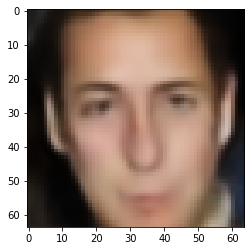

In [20]:
pre = full_model_e.predict(index[0:40])
plt.imshow(pre[34])

In [21]:
print(pca.explained_variance_ratio_)#singular_values_

[0.07560578 0.04469287 0.03801776 0.0269111  0.02169086 0.02049861
 0.01766976 0.01709438 0.01508802 0.01414306 0.01361461 0.01236472
 0.01185054 0.01125159 0.01075714 0.00947028 0.00935532 0.00901326
 0.00875825 0.00816792 0.00808483 0.00782336 0.00754425 0.00729234
 0.00727745 0.00687558 0.00664343 0.00622878 0.00619379 0.00612695
 0.00604464 0.00596221 0.00570126 0.00558428 0.00542471 0.00538799
 0.00527383 0.00519341 0.00511335 0.00501767 0.00488642 0.00480985
 0.00473839 0.00471642 0.00457642 0.00449582 0.00442696 0.00436125
 0.00431924 0.00420606 0.00417619 0.00413198 0.00408717 0.00405703
 0.00403699 0.00388399 0.00382506 0.00379151 0.00375982 0.00373977
 0.00368216 0.00363834 0.00363304 0.00359969 0.00353057 0.00347308
 0.00341509 0.00339702 0.00335494 0.00332139 0.00329804 0.00327823
 0.00325923 0.00322913 0.00320535 0.00314698 0.00311767 0.0031121
 0.00310259 0.0030414  0.00301506 0.00298658 0.00297423 0.00294984
 0.0029136  0.00287761 0.00287278 0.00286344 0.00283125 0.00279

https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=ad-fjFOQxoFG

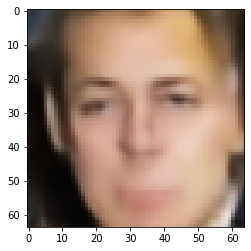

In [43]:
#@title Number fields { run: "auto" }
a=0
img_pca_enc = pca_enc[34]

# for i in range(300):
#    img_pca_enc[i] = 0

img_pca_enc_0 = 0.6 #@param {type:"slider", min:-10, max:10, step:0.1}
img_pca_enc_1 = -1   #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_2 = -1   #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_3 = 0   #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_4 = 0   #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_5 = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
img_pca_enc_6 = 0 #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_7 = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
img_pca_enc_8 = 0 #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_9 = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
img_pca_enc_10 = 0 #@param {type:"slider", min:-10, max:10, step:1}
img_pca_enc_11 = 0 #@param {type:"slider", min:-10, max:10, step:0.1}

img_pca_enc[0] = img_pca_enc_0
img_pca_enc[1] = img_pca_enc_1
img_pca_enc[2] = img_pca_enc_2
img_pca_enc[3] = img_pca_enc_3
img_pca_enc[4] = img_pca_enc_4
img_pca_enc[5] = img_pca_enc_5
img_pca_enc[6] = img_pca_enc_6
img_pca_enc[7] = img_pca_enc_7
img_pca_enc[8] = img_pca_enc_6
img_pca_enc[9] = img_pca_enc_7
img_pca_enc[10] = img_pca_enc_6
img_pca_enc[11] = img_pca_enc_7

img_enc = pca.inverse_transform(img_pca_enc.reshape(-1,300))
img = decoder_e.predict(img_enc.reshape(-1,300))
plt.imshow(img.reshape(64,64,3))

In [ ]:
pca_enc.shape

(5696, 300)